In [65]:
import pandas as pd
import urllib.parse
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("clean_data.csv")

In [67]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']
df_houses = df[df['Type of property'] == 'house']
df_apartments = df[df['Type of property'] == 'apartment']
apartdf = df_apartments.select_dtypes(include=numerics)
noIdApartDf = apartdf.loc[:, ~apartdf.columns.isin(['id'])]
noIdApartDf.corr(method = 'spearman')

,Zip,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
Zip,1.000000,-0.112643,-0.136428,-0.000689,0.033510,-0.034768,-0.076945,0.078560,-0.169189,NaN,-0.102179,-0.031643,-0.017841,-0.060369,0.102843,-0.029304,-0.064426,-0.007554
Price,-0.112643,1.000000,0.616502,0.194172,0.053064,0.524020,0.641100,-0.000981,0.253054,NaN,-0.269952,0.104770,0.250752,0.402303,0.096239,0.068301,0.095388,0.061154
Price of square meter,-0.136428,0.616502,1.000000,0.194030,-0.040243,-0.012985,-0.100120,0.193289,0.206269,NaN,-0.192631,0.111778,0.124974,0.173127,0.030838,-0.008012,0.026084,0.058108
Building Cond. values,-0.000689,0.194172,0.194030,1.000000,-0.034953,0.034507,0.068314,0.061409,0.335104,NaN,-0.064506,0.155468,0.075734,0.105510,-0.033481,0.029374,-0.002691,0.057919
Number of facades,0.033510,0.053064,-0.040243,-0.034953,1.000000,0.112640,0.129092,-0.077899,0.012896,NaN,-0.110476,-0.034105,0.075480,0.164375,0.071941,0.064942,0.032980,0.028306
Number of rooms,-0.034768,0.524020,-0.012985,0.034507,0.112640,1.000000,0.750287,-0.095922,0.078524,NaN,-0.055602,0.045463,0.151293,0.254622,0.049858,0.047305,0.074217,0.034486
Living area,-0.076945,0.641100,-0.100120,0.068314,0.129092,0.750287,1.000000,-0.183962,0.143069,NaN,-0.152125,0.022676,0.205613,0.380189,0.097872,0.101659,0.111555,0.045652
Furnished,0.078560,-0.000981,0.193289,0.061409,-0.077899,-0.095922,-0.183962,1.000000,0.010828,NaN,0.053870,0.030454,-0.051812,-0.100394,-0.033331,-0.052172,-0.027389,0.033347
Kitchen values,-0.169189,0.253054,0.206269,0.335104,0.012896,0.078524,0.143069,0.010828,1.000000,NaN,-0.108972,0.077217,0.162203,0.219671,-0.010645,0.053934,0.014572,0.044939
Surface of the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
housedf = df_houses.select_dtypes(include=numerics)
noIdHouseDf = housedf.loc[:, ~housedf.columns.isin(['id', 'Zip'])]
noIdHouseDf.corr(method = 'spearman')

,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
Price,1.000000,0.664400,0.267317,0.303484,0.526919,0.708811,0.009590,0.190946,0.421041,-0.332577,0.263089,0.140829,0.191072,0.057048,0.106911,0.188644,0.260953
Price of square meter,0.664400,1.000000,0.256205,0.202991,0.093620,0.017212,0.042563,0.207709,0.167991,-0.243325,0.210549,0.138842,0.145421,0.066072,0.080205,0.094521,0.178552
Building Cond. values,0.267317,0.256205,1.000000,0.068958,0.080063,0.138196,0.031727,0.289956,0.033731,-0.312065,0.339124,0.170922,0.227849,0.043897,0.078100,0.025335,0.133699
Number of facades,0.303484,0.202991,0.068958,1.000000,0.130046,0.229320,0.002399,0.064878,0.722604,0.041344,-0.006318,0.083282,0.148873,0.072593,0.207808,0.198667,0.215351
Number of rooms,0.526919,0.093620,0.080063,0.130046,1.000000,0.653311,0.008830,0.061367,0.254589,-0.141007,0.156036,0.065497,0.134974,0.044414,0.097264,0.100298,0.158345
Living area,0.708811,0.017212,0.138196,0.229320,0.653311,1.000000,-0.010263,0.087594,0.419429,-0.214579,0.160315,0.076107,0.143786,0.011333,0.076299,0.166876,0.222062
Furnished,0.009590,0.042563,0.031727,0.002399,0.008830,-0.010263,1.000000,0.026043,-0.018284,-0.016620,-0.008925,0.010069,0.013092,-0.001870,0.006633,-0.012361,0.036687
Kitchen values,0.190946,0.207709,0.289956,0.064878,0.061367,0.087594,0.026043,1.000000,0.039304,-0.129546,0.147445,0.195941,0.237402,0.065031,0.084786,0.032264,0.114586
Surface of the land,0.421041,0.167991,0.033731,0.722604,0.254589,0.419429,-0.018284,0.039304,1.000000,0.038587,-0.002434,0.082954,0.168991,0.161334,0.344383,0.200504,0.253196
Primary energy consumption,-0.332577,-0.243325,-0.312065,0.041344,-0.141007,-0.214579,-0.016620,-0.129546,0.038587,1.000000,-0.520198,-0.096580,-0.143081,0.013628,0.021707,-0.039269,-0.104210


In [69]:
# How are variables correlated to each other? (Why?)
corr_matrix = noIdHouseDf.corr(method='spearman')


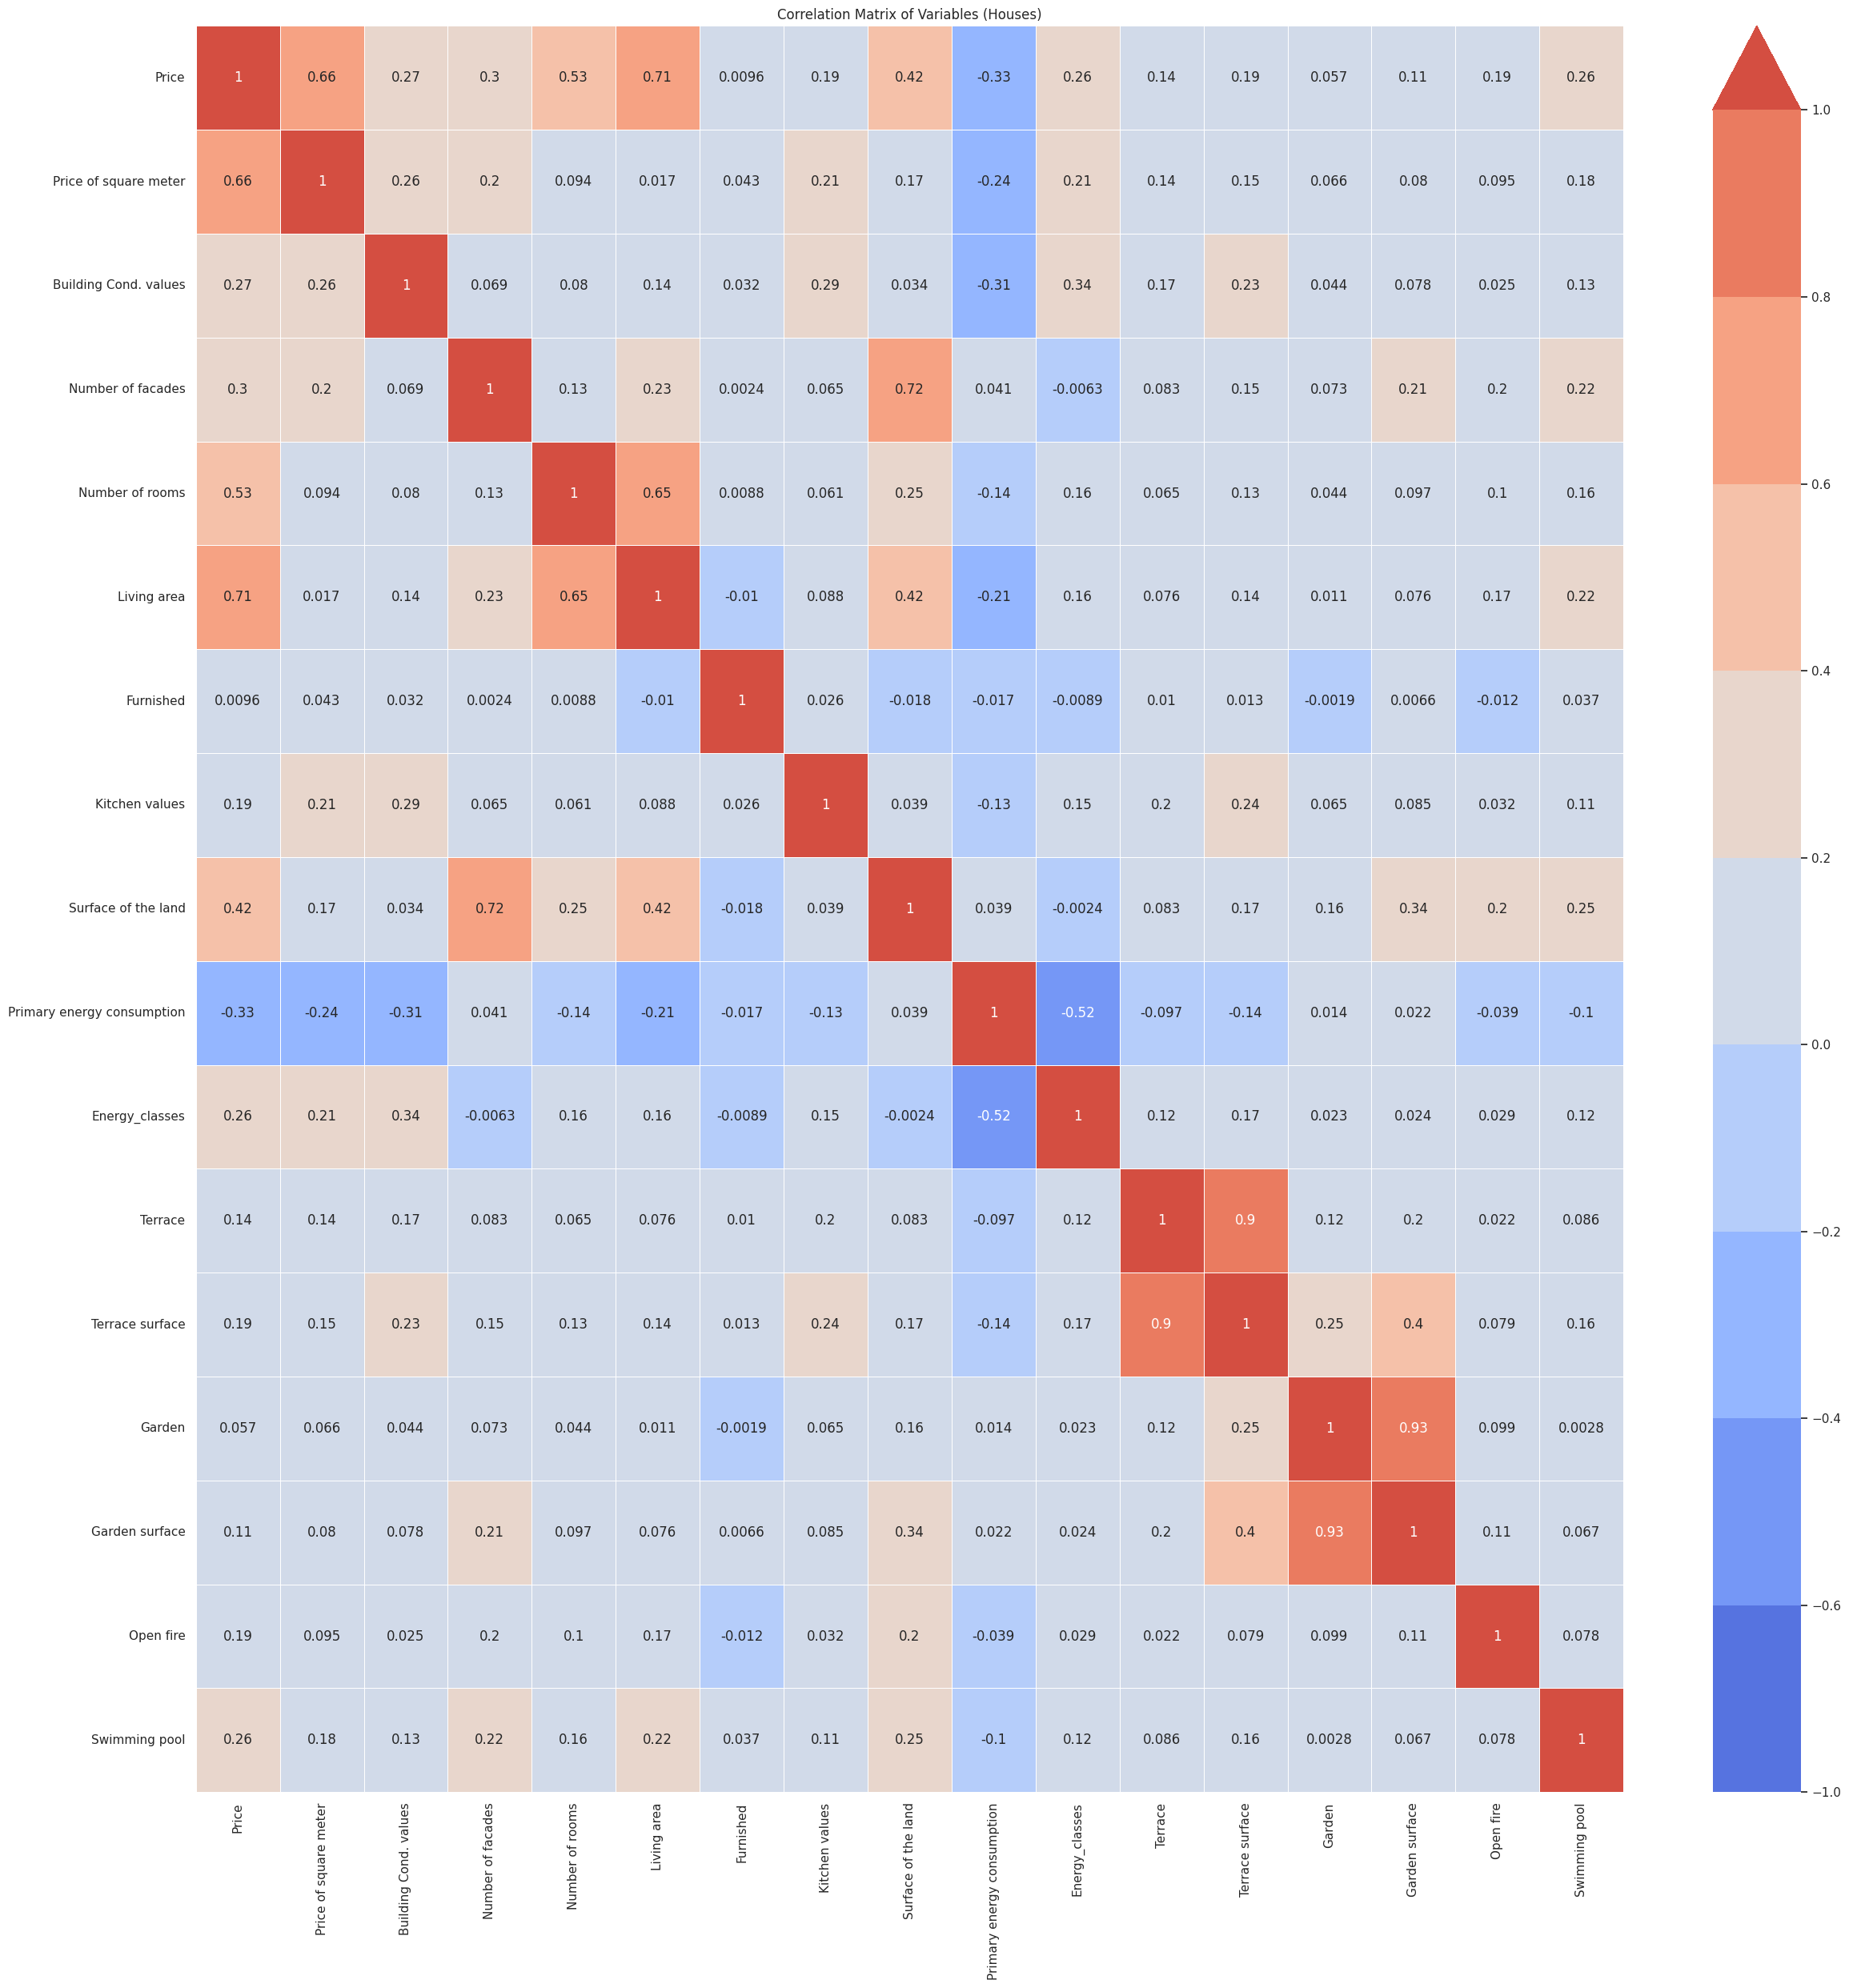

In [70]:
colors = sns.color_palette('coolwarm', 10)
levels = [-1.0, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr_matrix, cmap = cmap, annot=True, linewidths=.5, norm=norm)

"""sns.heatmap(corr_matrix, annot=True)
sns.color_palette("coolwarm", 8)"""
plt.title('Correlation Matrix of Variables (Houses)')
sns.set (rc = {'figure.figsize':(25, 25)})
plt.show()

In [71]:
plt.rcParams["figure.figsize"] = [20.00, 15.00]
plt.rcParams["figure.autolayout"] = True

"""df.groupby('Province')['Price'].mean().plot(kind = 'bar',
       rot = 0,
       xlabel = 'Province',
       ylabel = 'Price in Euros')"""



"df.groupby('Province')['Price'].mean().plot(kind = 'bar',\n       rot = 0,\n       xlabel = 'Province',\n       ylabel = 'Price in Euros')"

In [72]:
# Which variables have the greatest influence on the price?


In [73]:
# Which variables have the least influence on the price?


In [74]:
# How many qualitative and quantitative variables are there? How would you transform these values into numerical values?


In [75]:
# Percentage of missing values per column?
